In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 

In [372]:
df = pd.read_csv('WineQT.csv')
# df.drop(df['Id'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [373]:
df.drop(df.columns[12], axis=1, inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [374]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [376]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

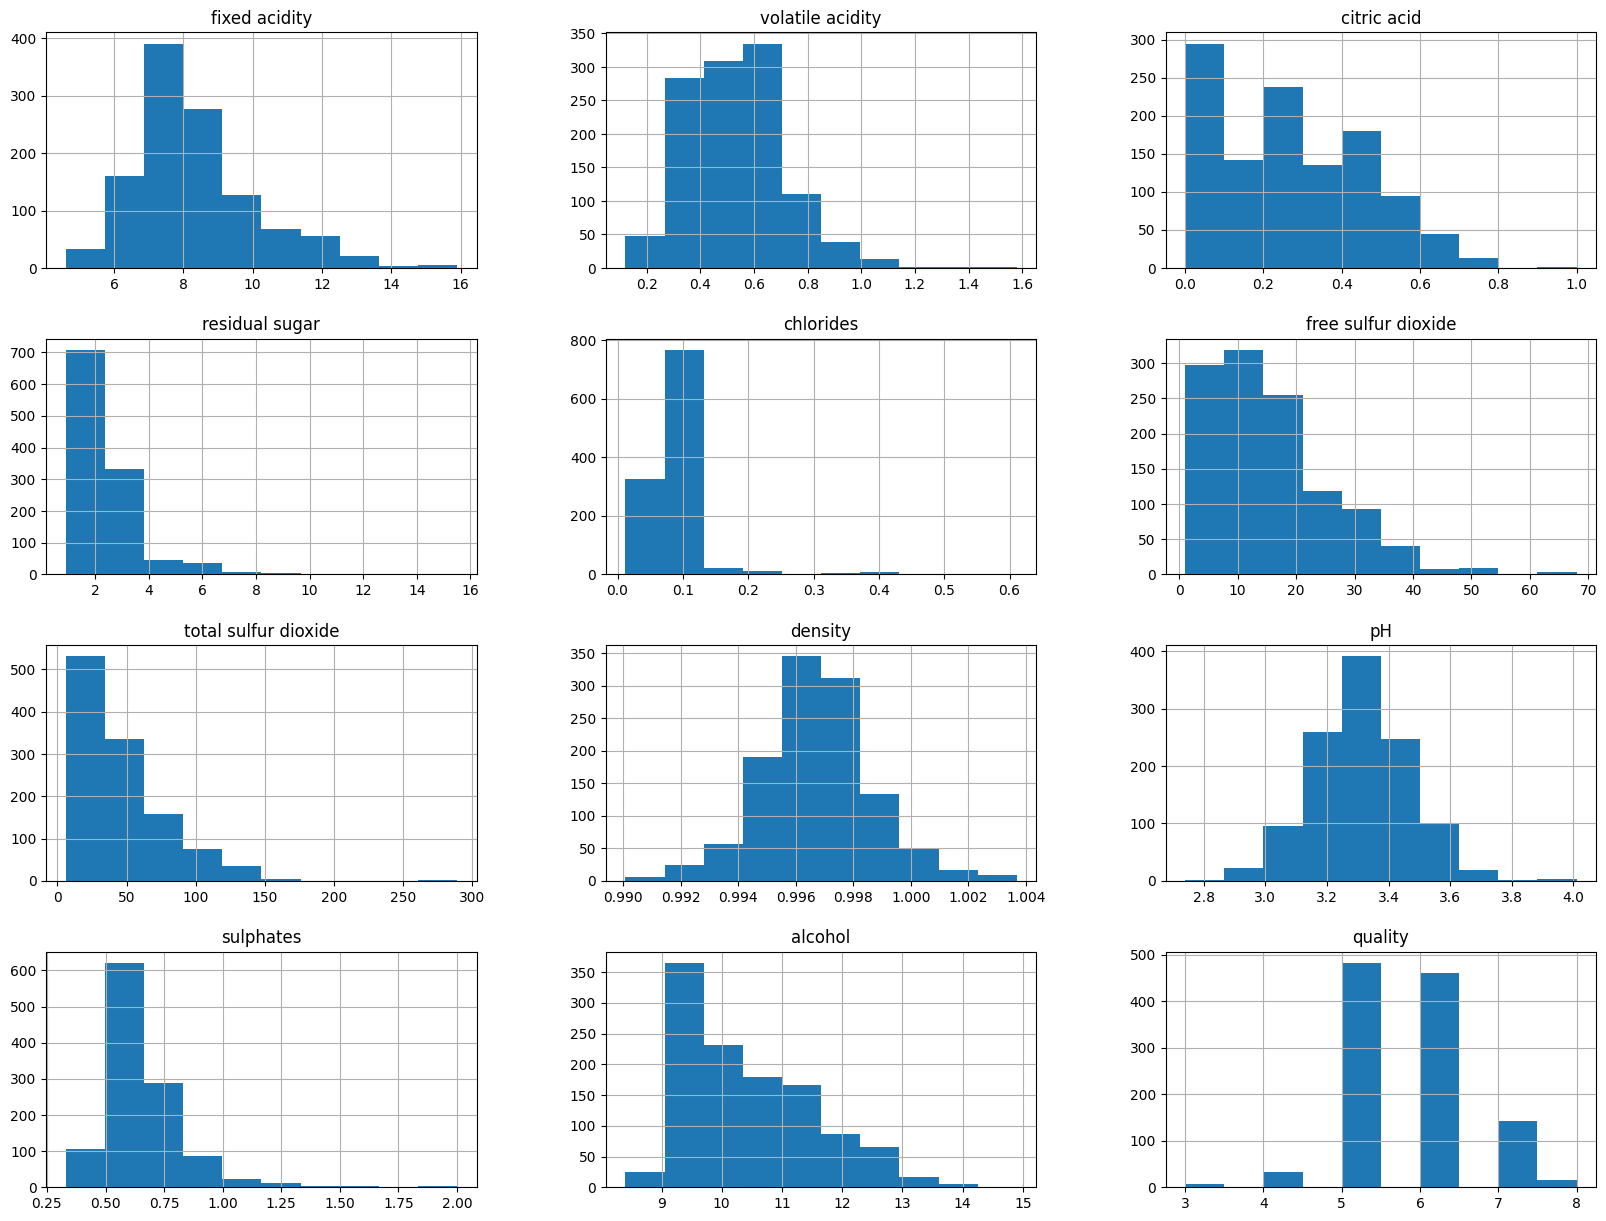

In [377]:
df.hist(bins=10, figsize=(20, 15))

Text(0, 0.5, 'Alcohol')

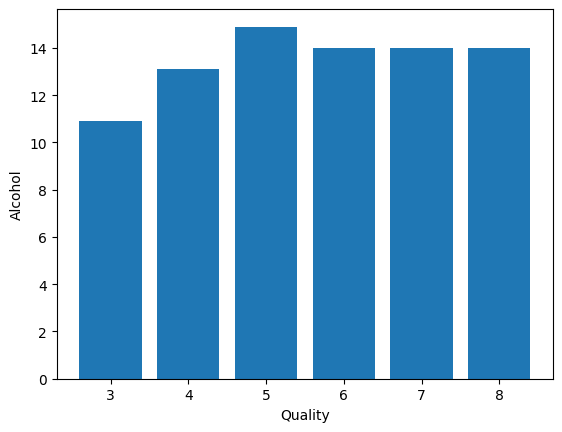

In [378]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')

<Axes: >

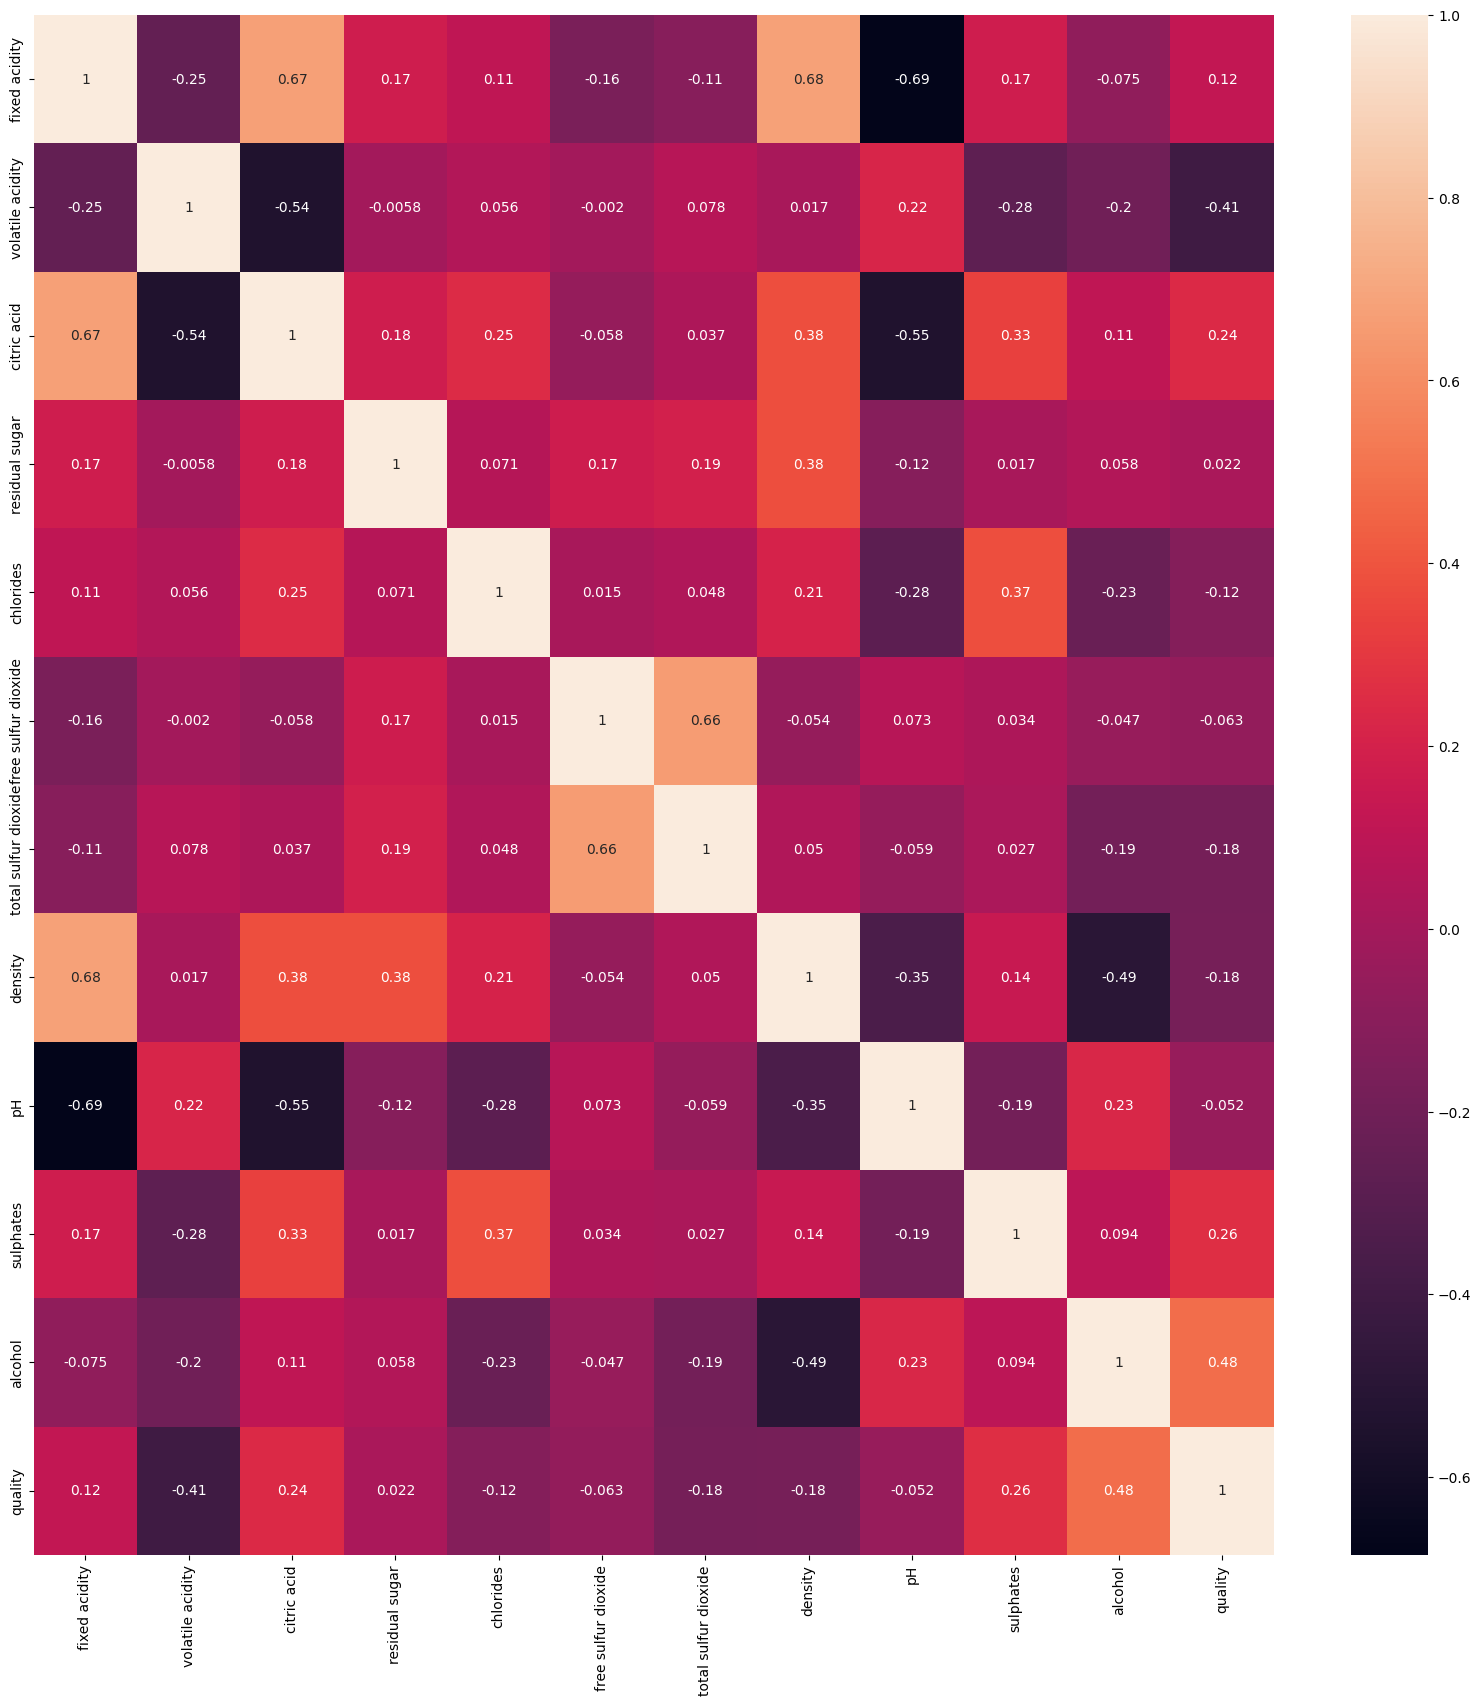

In [379]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)


In [380]:

df['best quality'] = [1 if x > 5 else 0 for x in df.quality]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [381]:
X = df.drop(['quality' , 'best quality'], axis=1)
# X = df.drop(['quality'], axis=1)
Y = df['best quality']
# Y = df['quality']

In [382]:
Y_reg

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

# TRAIN TEST SPLIT 

In [383]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
X_train.shape

(914, 11)

In [384]:
X_test.shape

(229, 11)

# SVC

In [385]:
# Support vector machine algorithm
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [386]:
predictions_svc = svc.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions_svc)

0.6157205240174672

In [387]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions_svc))

              precision    recall  f1-score   support

           0       0.64      0.35      0.45       104
           1       0.61      0.84      0.70       125

    accuracy                           0.62       229
   macro avg       0.62      0.59      0.58       229
weighted avg       0.62      0.62      0.59       229



# LINEAR REGRESSION

In [388]:
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression classifier
lr_model = LogisticRegression()

# Train Logistic Regression classifier
lr_model.fit(X_train, Y_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [389]:
# Evaluate Logistic Regression classifier
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(Y_test, lr_predictions)
print('Logistic Regression Accuracy:', lr_accuracy)

Logistic Regression Accuracy: 0.7292576419213974


In [390]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       104
           1       0.74      0.78      0.76       125

    accuracy                           0.73       229
   macro avg       0.73      0.72      0.73       229
weighted avg       0.73      0.73      0.73       229



# RANDOM FOREST CLASSIFIER

In [391]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [392]:
rf_prediction = rf_model.predict(X_test)

# Calculate the accuracy score
accuracy_score(Y_test, rf_prediction)

0.7947598253275109

In [393]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77       104
           1       0.80      0.84      0.82       125

    accuracy                           0.79       229
   macro avg       0.79      0.79      0.79       229
weighted avg       0.79      0.79      0.79       229



# FEATURE SELECTION

In [394]:
feature_imp = pd.Series(rf_model.feature_importances_, index=df.columns[:11]).sort_values(ascending=False)
feature_imp

alcohol                 0.190753
sulphates               0.140950
volatile acidity        0.116305
total sulfur dioxide    0.104026
density                 0.082745
chlorides               0.073272
fixed acidity           0.067419
pH                      0.059816
citric acid             0.057354
free sulfur dioxide     0.055656
residual sugar          0.051702
dtype: float64

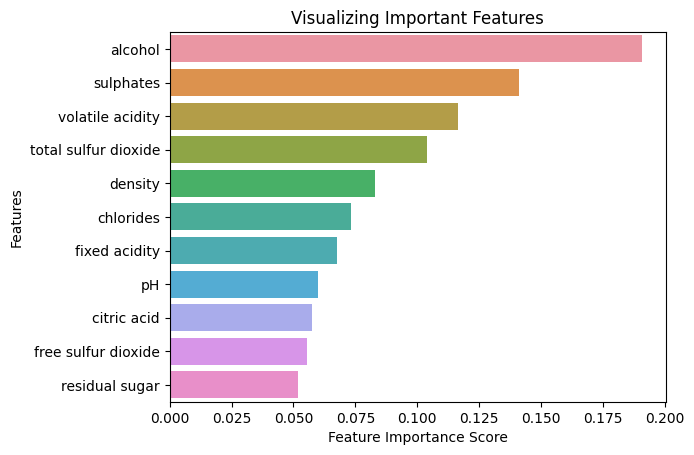

In [395]:
%matplotlib inline
import seaborn as sns

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
# plt.legend()
plt.show()

# K-NEAREST NEIGHBOUR

In [396]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier()

# Train K-Nearest Neighbors classifier
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [397]:
# Evaluate K-Nearest Neighbors classifier
knn_predictions = knn_model.predict(X_test)
accuracy_score(Y_test, knn_predictions)


0.6157205240174672

In [398]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.58      0.59      0.58       104
           1       0.65      0.64      0.65       125

    accuracy                           0.62       229
   macro avg       0.61      0.61      0.61       229
weighted avg       0.62      0.62      0.62       229



# LOGISTIC REGRESSION

In [399]:
from sklearn.linear_model import LogisticRegression  
lr_model= LogisticRegression(random_state=0)  
lr_model.fit(X_train, Y_train)  

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [400]:
lr_prediction = lr_model.predict(X_test)

# Calculate the accuracy score
accuracy_score(Y_test, lr_prediction)

0.7292576419213974

In [401]:
print(classification_report(Y_test, lr_prediction))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       104
           1       0.74      0.78      0.76       125

    accuracy                           0.73       229
   macro avg       0.73      0.72      0.73       229
weighted avg       0.73      0.73      0.73       229



# DECISION TREE

In [402]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [403]:
dt_prediction = dt_model.predict(X_test)
# Calculate the accuracy score
accuracy_score(Y_test, dt_prediction)

0.7205240174672489

In [404]:
print(classification_report(Y_test, dt_prediction))

              precision    recall  f1-score   support

           0       0.71      0.64      0.68       104
           1       0.73      0.78      0.75       125

    accuracy                           0.72       229
   macro avg       0.72      0.71      0.72       229
weighted avg       0.72      0.72      0.72       229



# HYPERPARAMETER TUNING

# FOR RANDOM FOREST

In [405]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators': [25,50, 100, 150],
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth': [3,4,5,6,7,8, 9],
#     'max_leaf_nodes': [3, 6, 9],
# }

# grid_search = GridSearchCV(RandomForestClassifier(), param_grid=params)
# grid_search.fit(X_train, Y_train)
# print(grid_search.best_estimator_)

In [406]:
# rf_final = RandomForestClassifier(max_depth=7, max_features='log2', max_leaf_nodes=9,n_estimators=150)
# rf_final.fit(X_train,Y_train)

In [407]:
# rf_final_prediction = rf_final.predict(X_test)
# accuracy_score(Y_test, rf_final_prediction)

# HYPERPARAMETER TUNING USING RANDOMIZED SEARCH CV

In [408]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [400, 500 , 600 , 700 , 800 , 900 , 1000],
    'max_depth': [None, 30 , 40 , 50 , 60 , 70 , 80 , 90 , 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train,Y_train)
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

Best parameters found:  {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 80}
Best score found:  0.7844712664384794


In [429]:
best_params = {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 80}


rf_final = RandomForestClassifier(**best_params)
rf_final.fit(X_train,Y_train)

RandomForestClassifier(max_depth=80, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=1000)

In [430]:
rf_final_prediction = rf_final.predict(X_test)
accuracy_score(Y_test, rf_final_prediction)

0.7947598253275109

# MODEL BUILDING

In [432]:
# Save the model
import pickle
with open('wine.pickle', 'wb') as f:
    pickle.dump(rf_model, f)